<a href="https://www.kaggle.com/code/hossamadel/house-prices-rms-hossam?scriptVersionId=105198251" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.preprocessing import OrdinalEncoder
from category_encoders import MEstimateEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate, GridSearchCV

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet, BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
data_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

data_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [4]:
data_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
data_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## Missing Values

In [5]:
data_train.shape

(1460, 81)

In [6]:
data_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
data_train.isnull().sum()*100/1460

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

<AxesSubplot:>

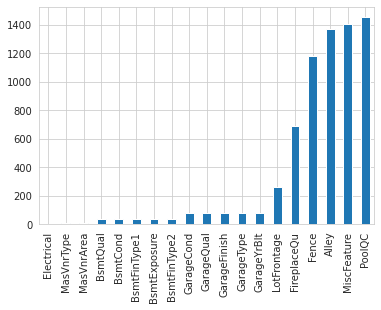

In [8]:
missing = data_train.isnull().sum()
missing = missing[missing> 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [9]:
data_train.drop(['Alley', 'MiscFeature','Fence','PoolQC','FireplaceQu'], axis = 1, inplace=True)

In [10]:
data_train.shape

(1460, 76)

In [11]:
data_test.drop(['Alley', 'MiscFeature','Fence','PoolQC','FireplaceQu'], axis = 1, inplace=True)


In [12]:
data_test.shape

(1459, 75)

## EDA

In [13]:
data_train.select_dtypes(include=['float64']).columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [14]:
data_train.select_dtypes(include=['int64']).columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

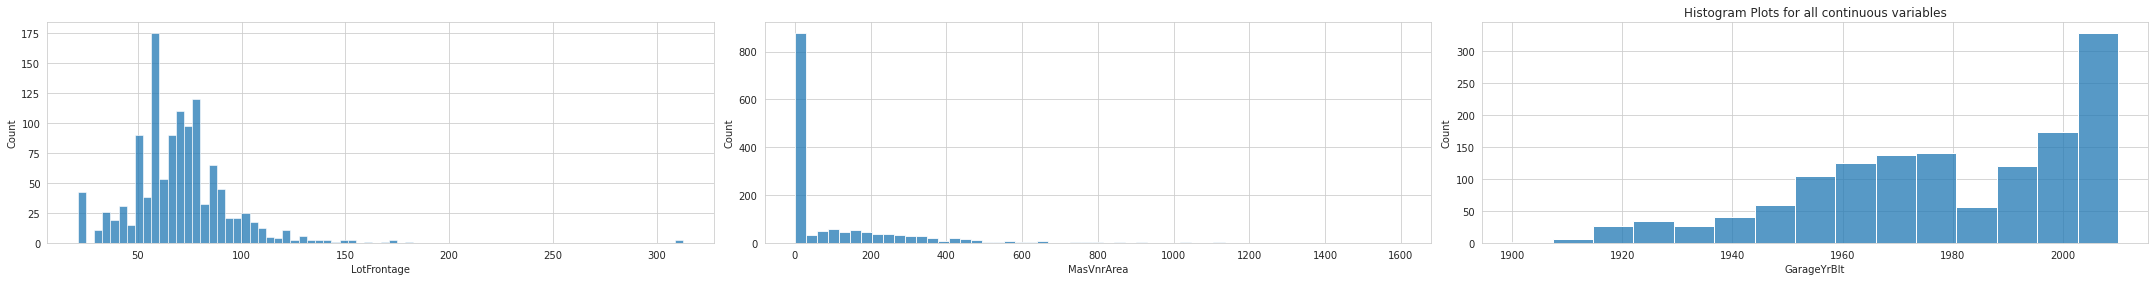

In [15]:
plt.figure(figsize=(40,40))
for i, col in enumerate(data_train.select_dtypes(include=['float64']).columns):
    ax = plt.subplot(11,4, i+1)
    sns.histplot(data=data_train, x=col, ax=ax)
plt.title('Histogram Plots for all continuous variables')
plt.tight_layout()

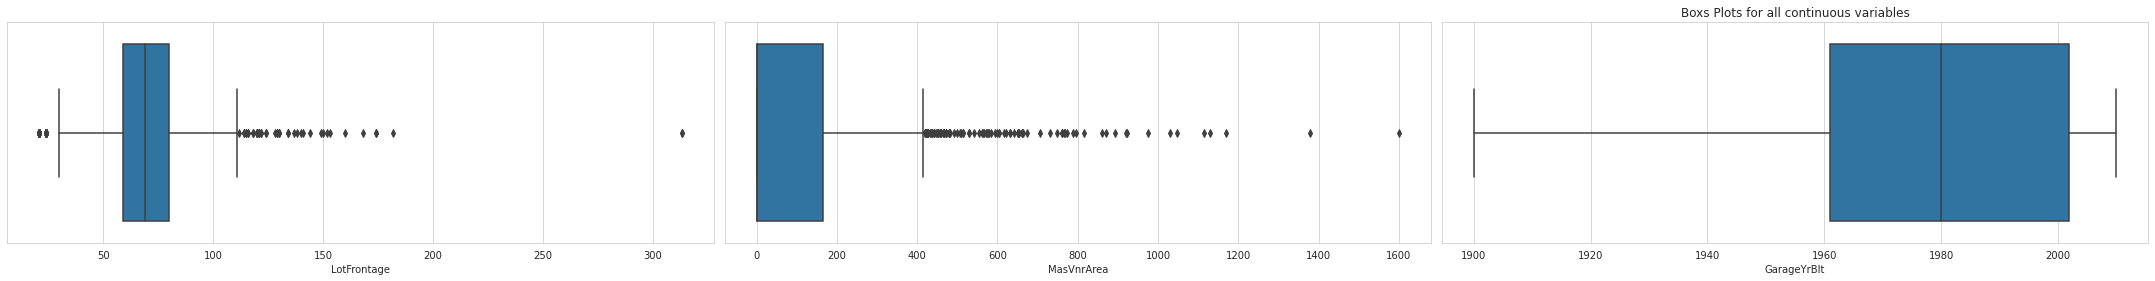

In [16]:
plt.figure(figsize=(40,40))
for i, col in enumerate(data_train.select_dtypes(include=['float64']).columns):
    ax = plt.subplot(11,4, i+1)
    sns.boxplot(data=data_train, x=col, ax=ax)
plt.title('Boxs Plots for all continuous variables')
plt.tight_layout()

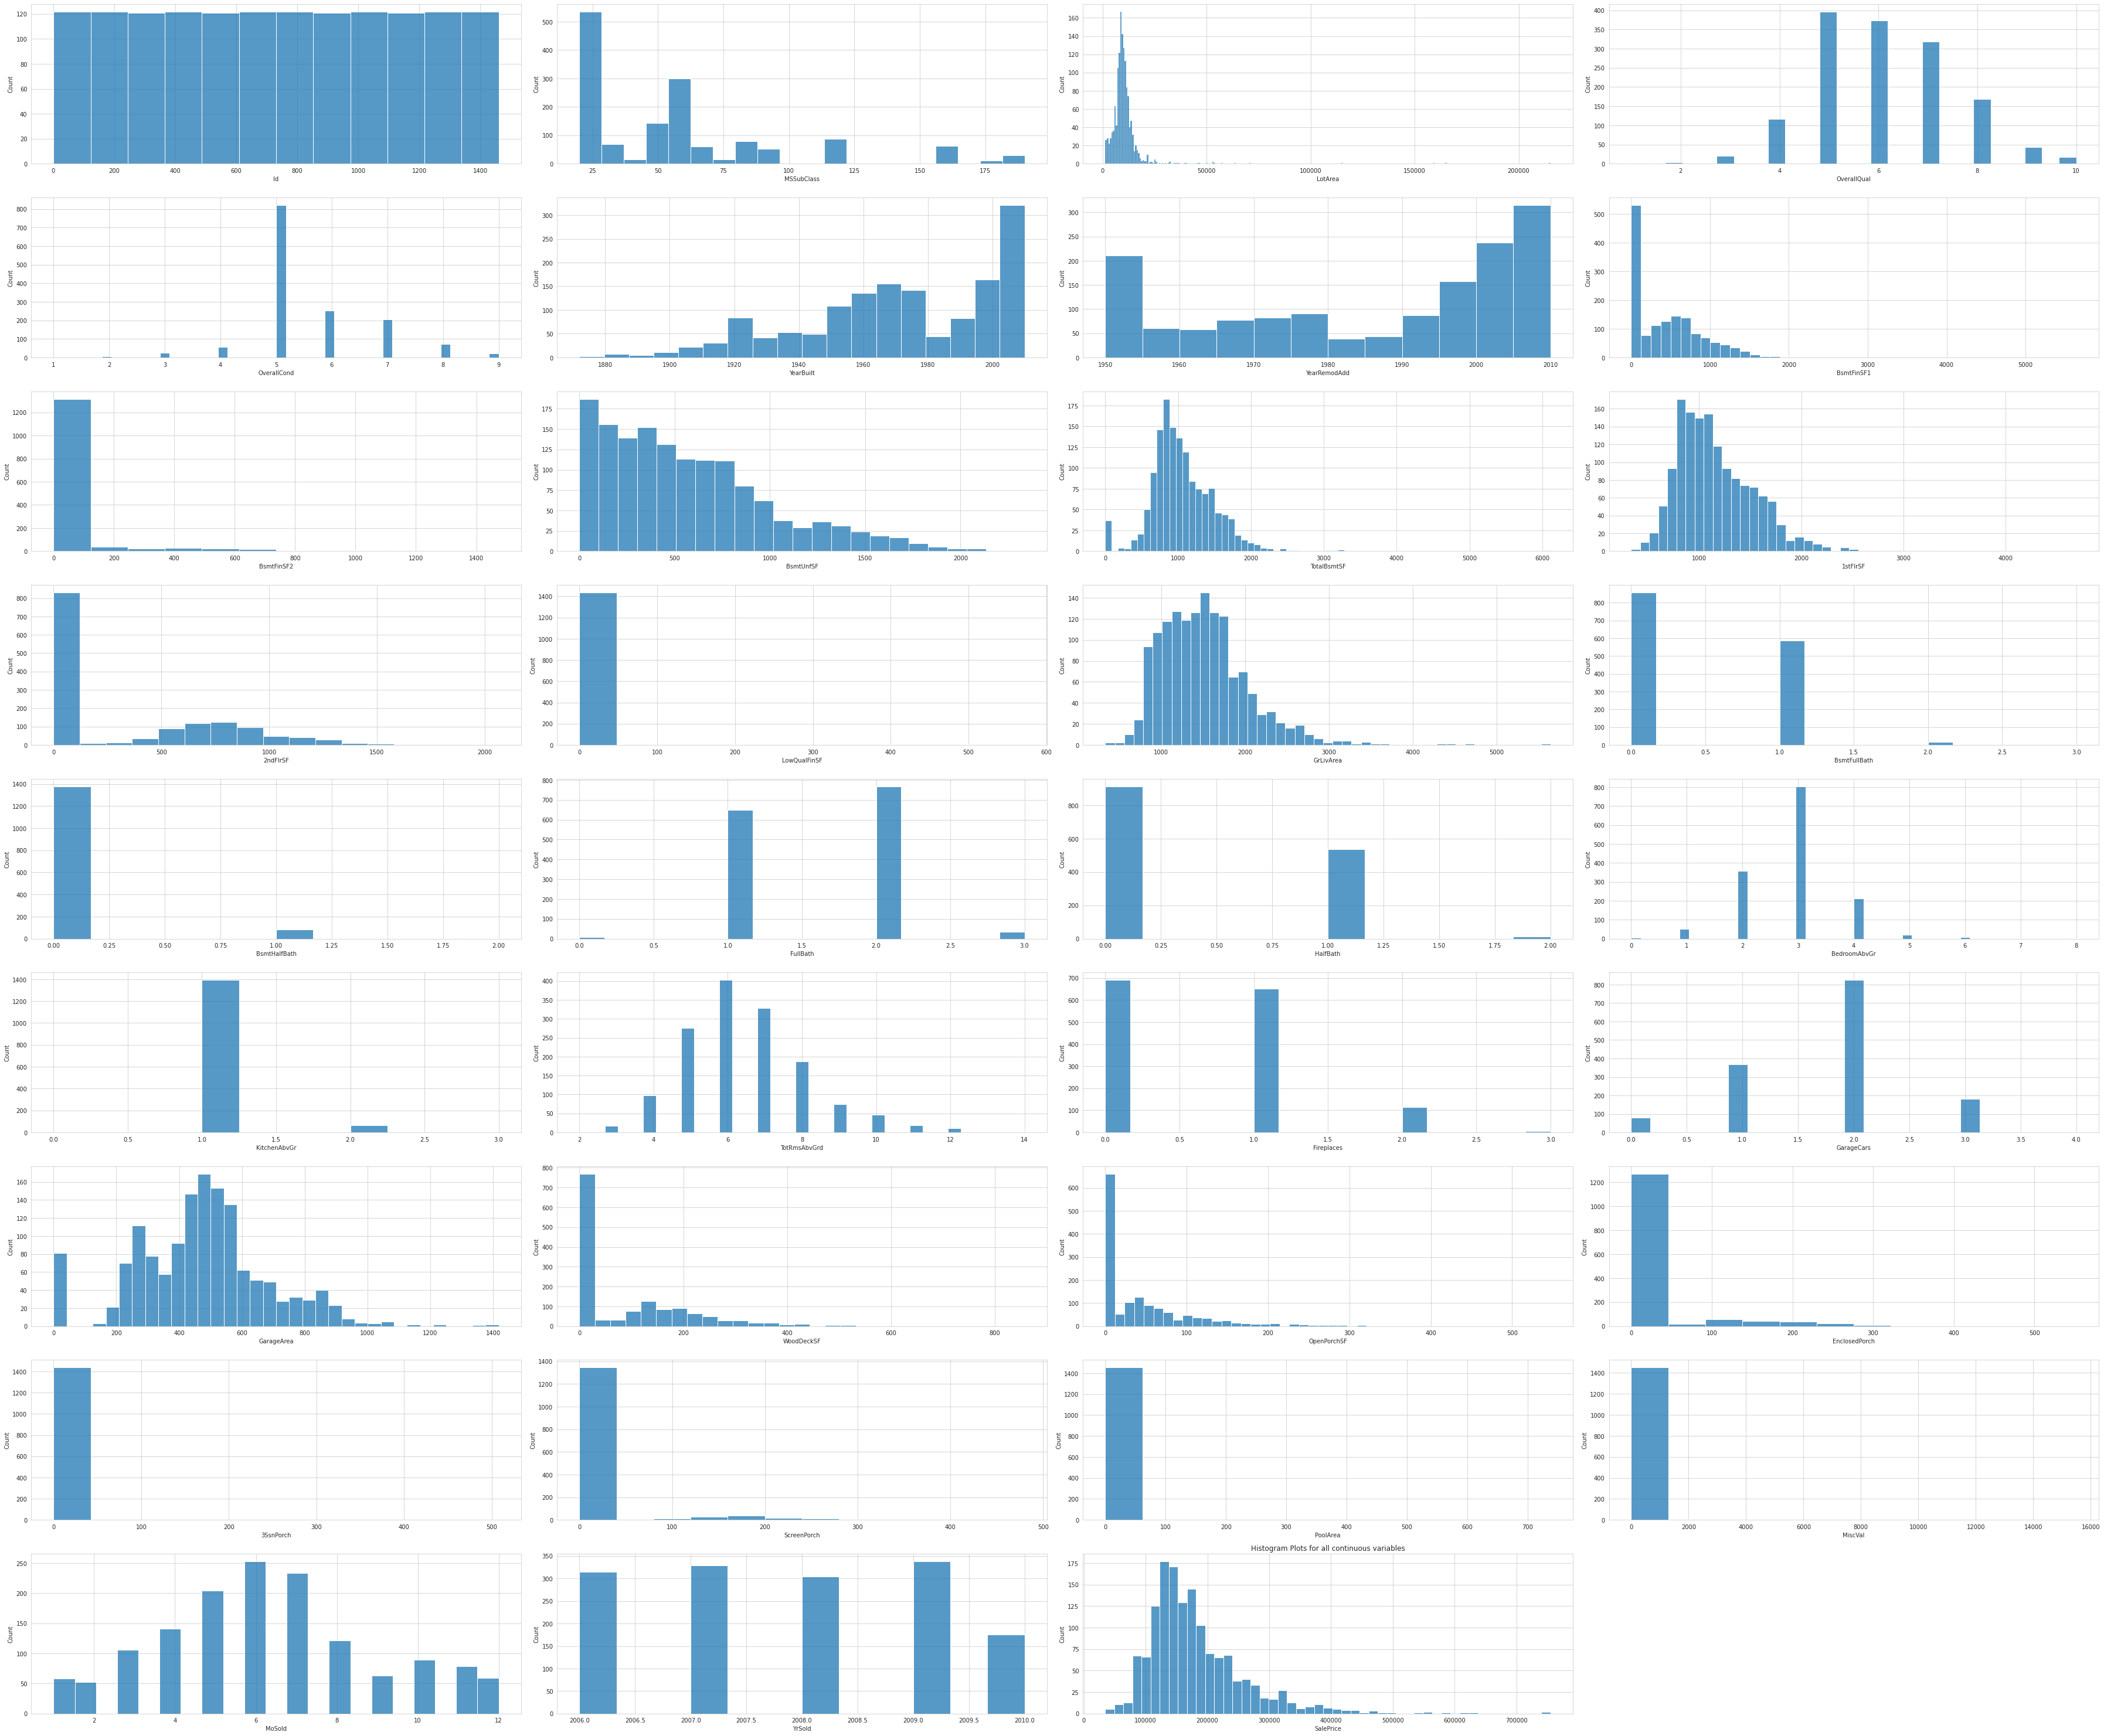

In [17]:
plt.figure(figsize=(50,50))
for i, col in enumerate(data_train.select_dtypes(include=['int64']).columns):
    ax = plt.subplot(11,4, i+1)
    sns.histplot(data=data_train, x=col, ax=ax)
plt.title('Histogram Plots for all continuous variables')
plt.tight_layout()

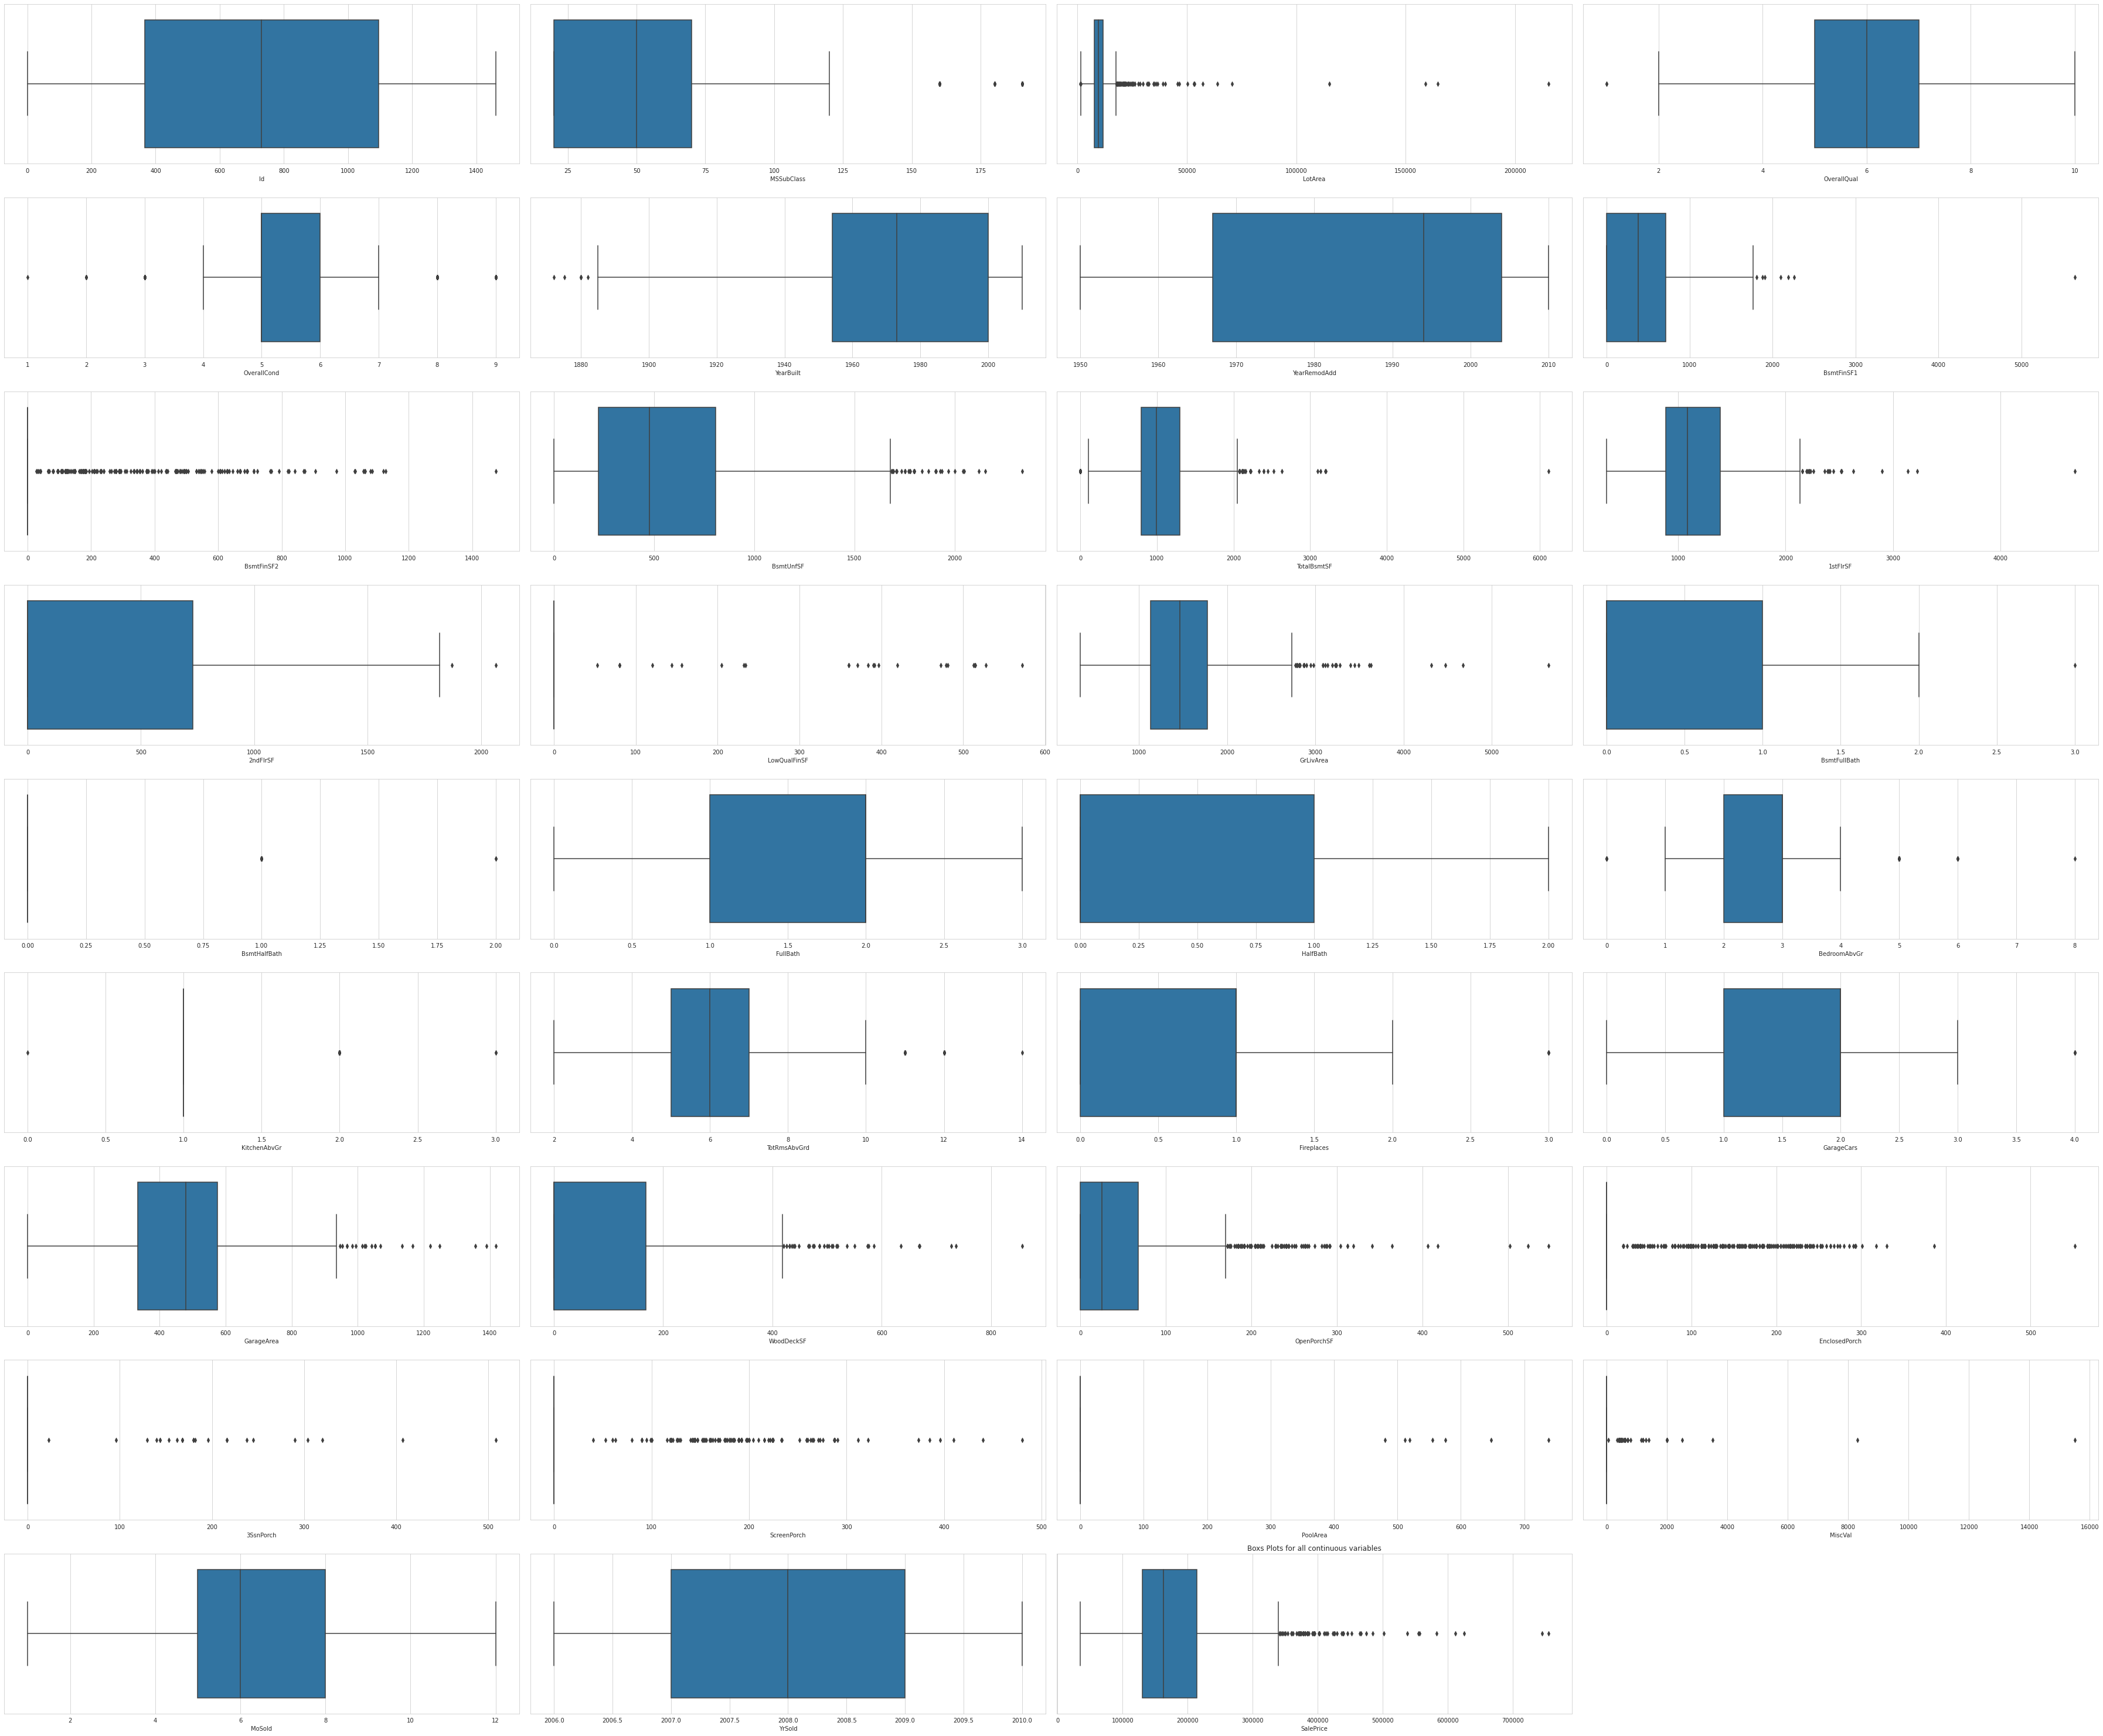

In [18]:
plt.figure(figsize=(50,50))
for i, col in enumerate(data_train.select_dtypes(include=['int64']).columns):
    ax = plt.subplot(11,4, i+1)
    sns.boxplot(data=data_train, x=col, ax=ax)
plt.title('Boxs Plots for all continuous variables')
plt.tight_layout()

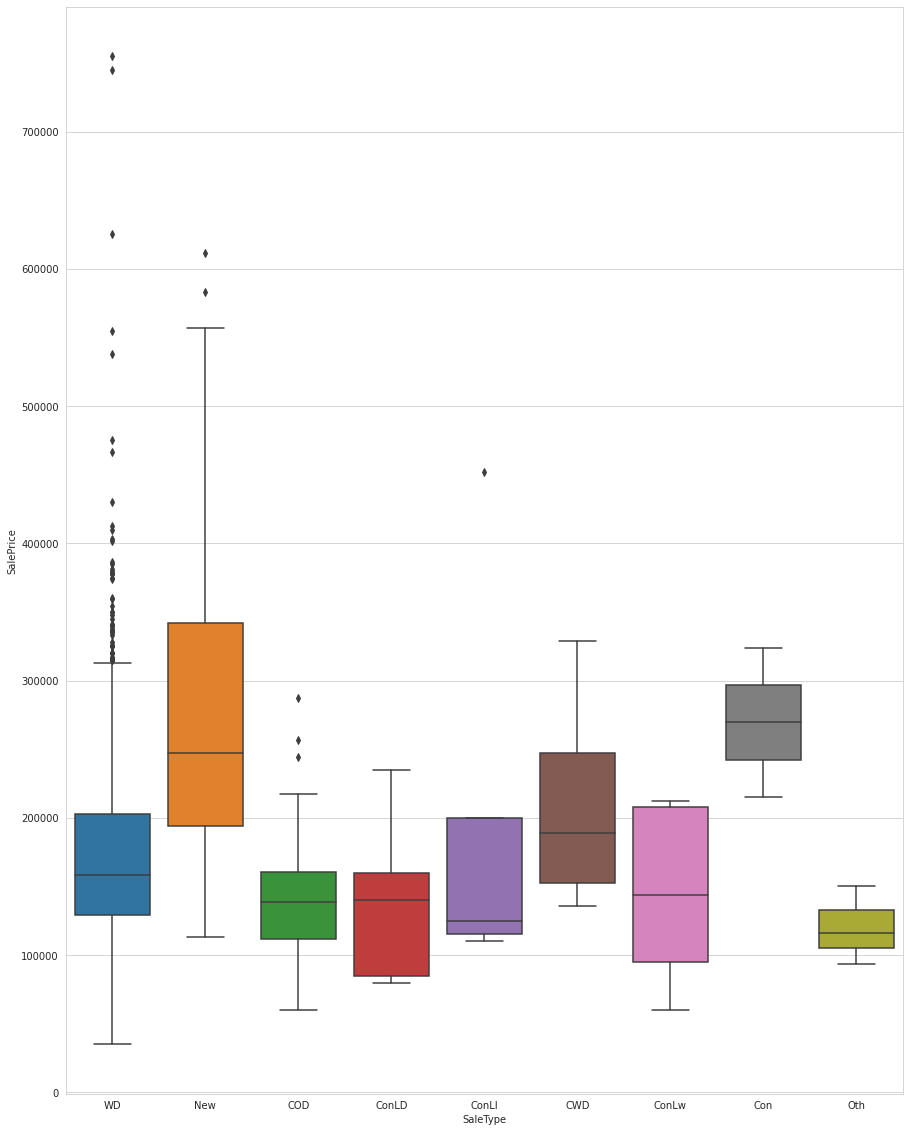

In [19]:
 ax=plt.subplots(figsize=(15,20))
fig=sns.boxplot(x='SaleType',y='SalePrice',data=data_train)

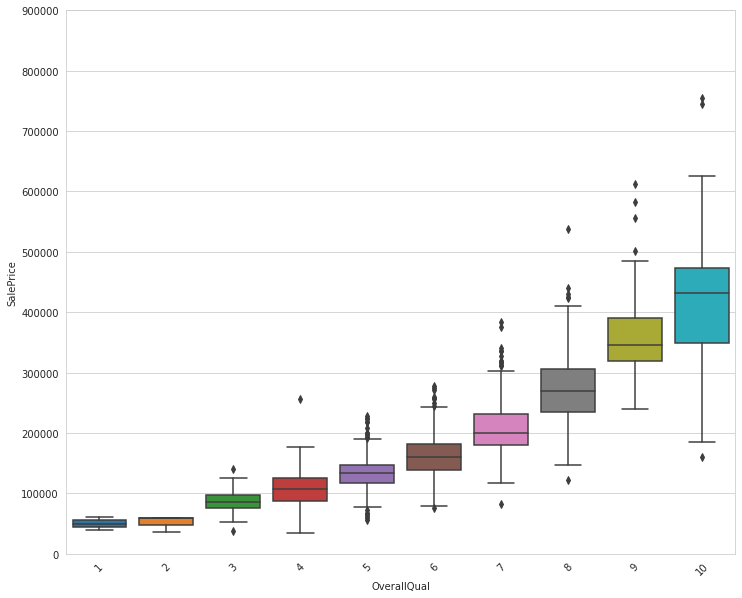

In [20]:
ax=plt.subplots(figsize=(12,10))
fig=sns.boxplot(x='OverallQual',y='SalePrice',data=data_train)
fig.axis(ymin=0,ymax=900000);
xt=plt.xticks(rotation=45)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

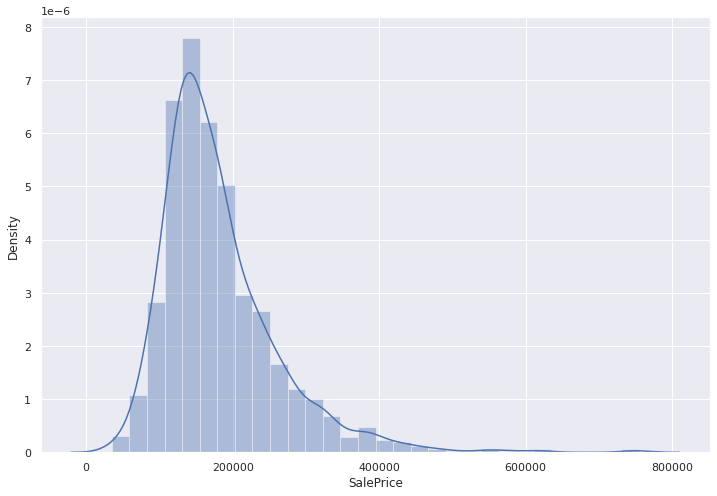

In [21]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(data_train['SalePrice'],kde=True,bins=30)

In [22]:
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

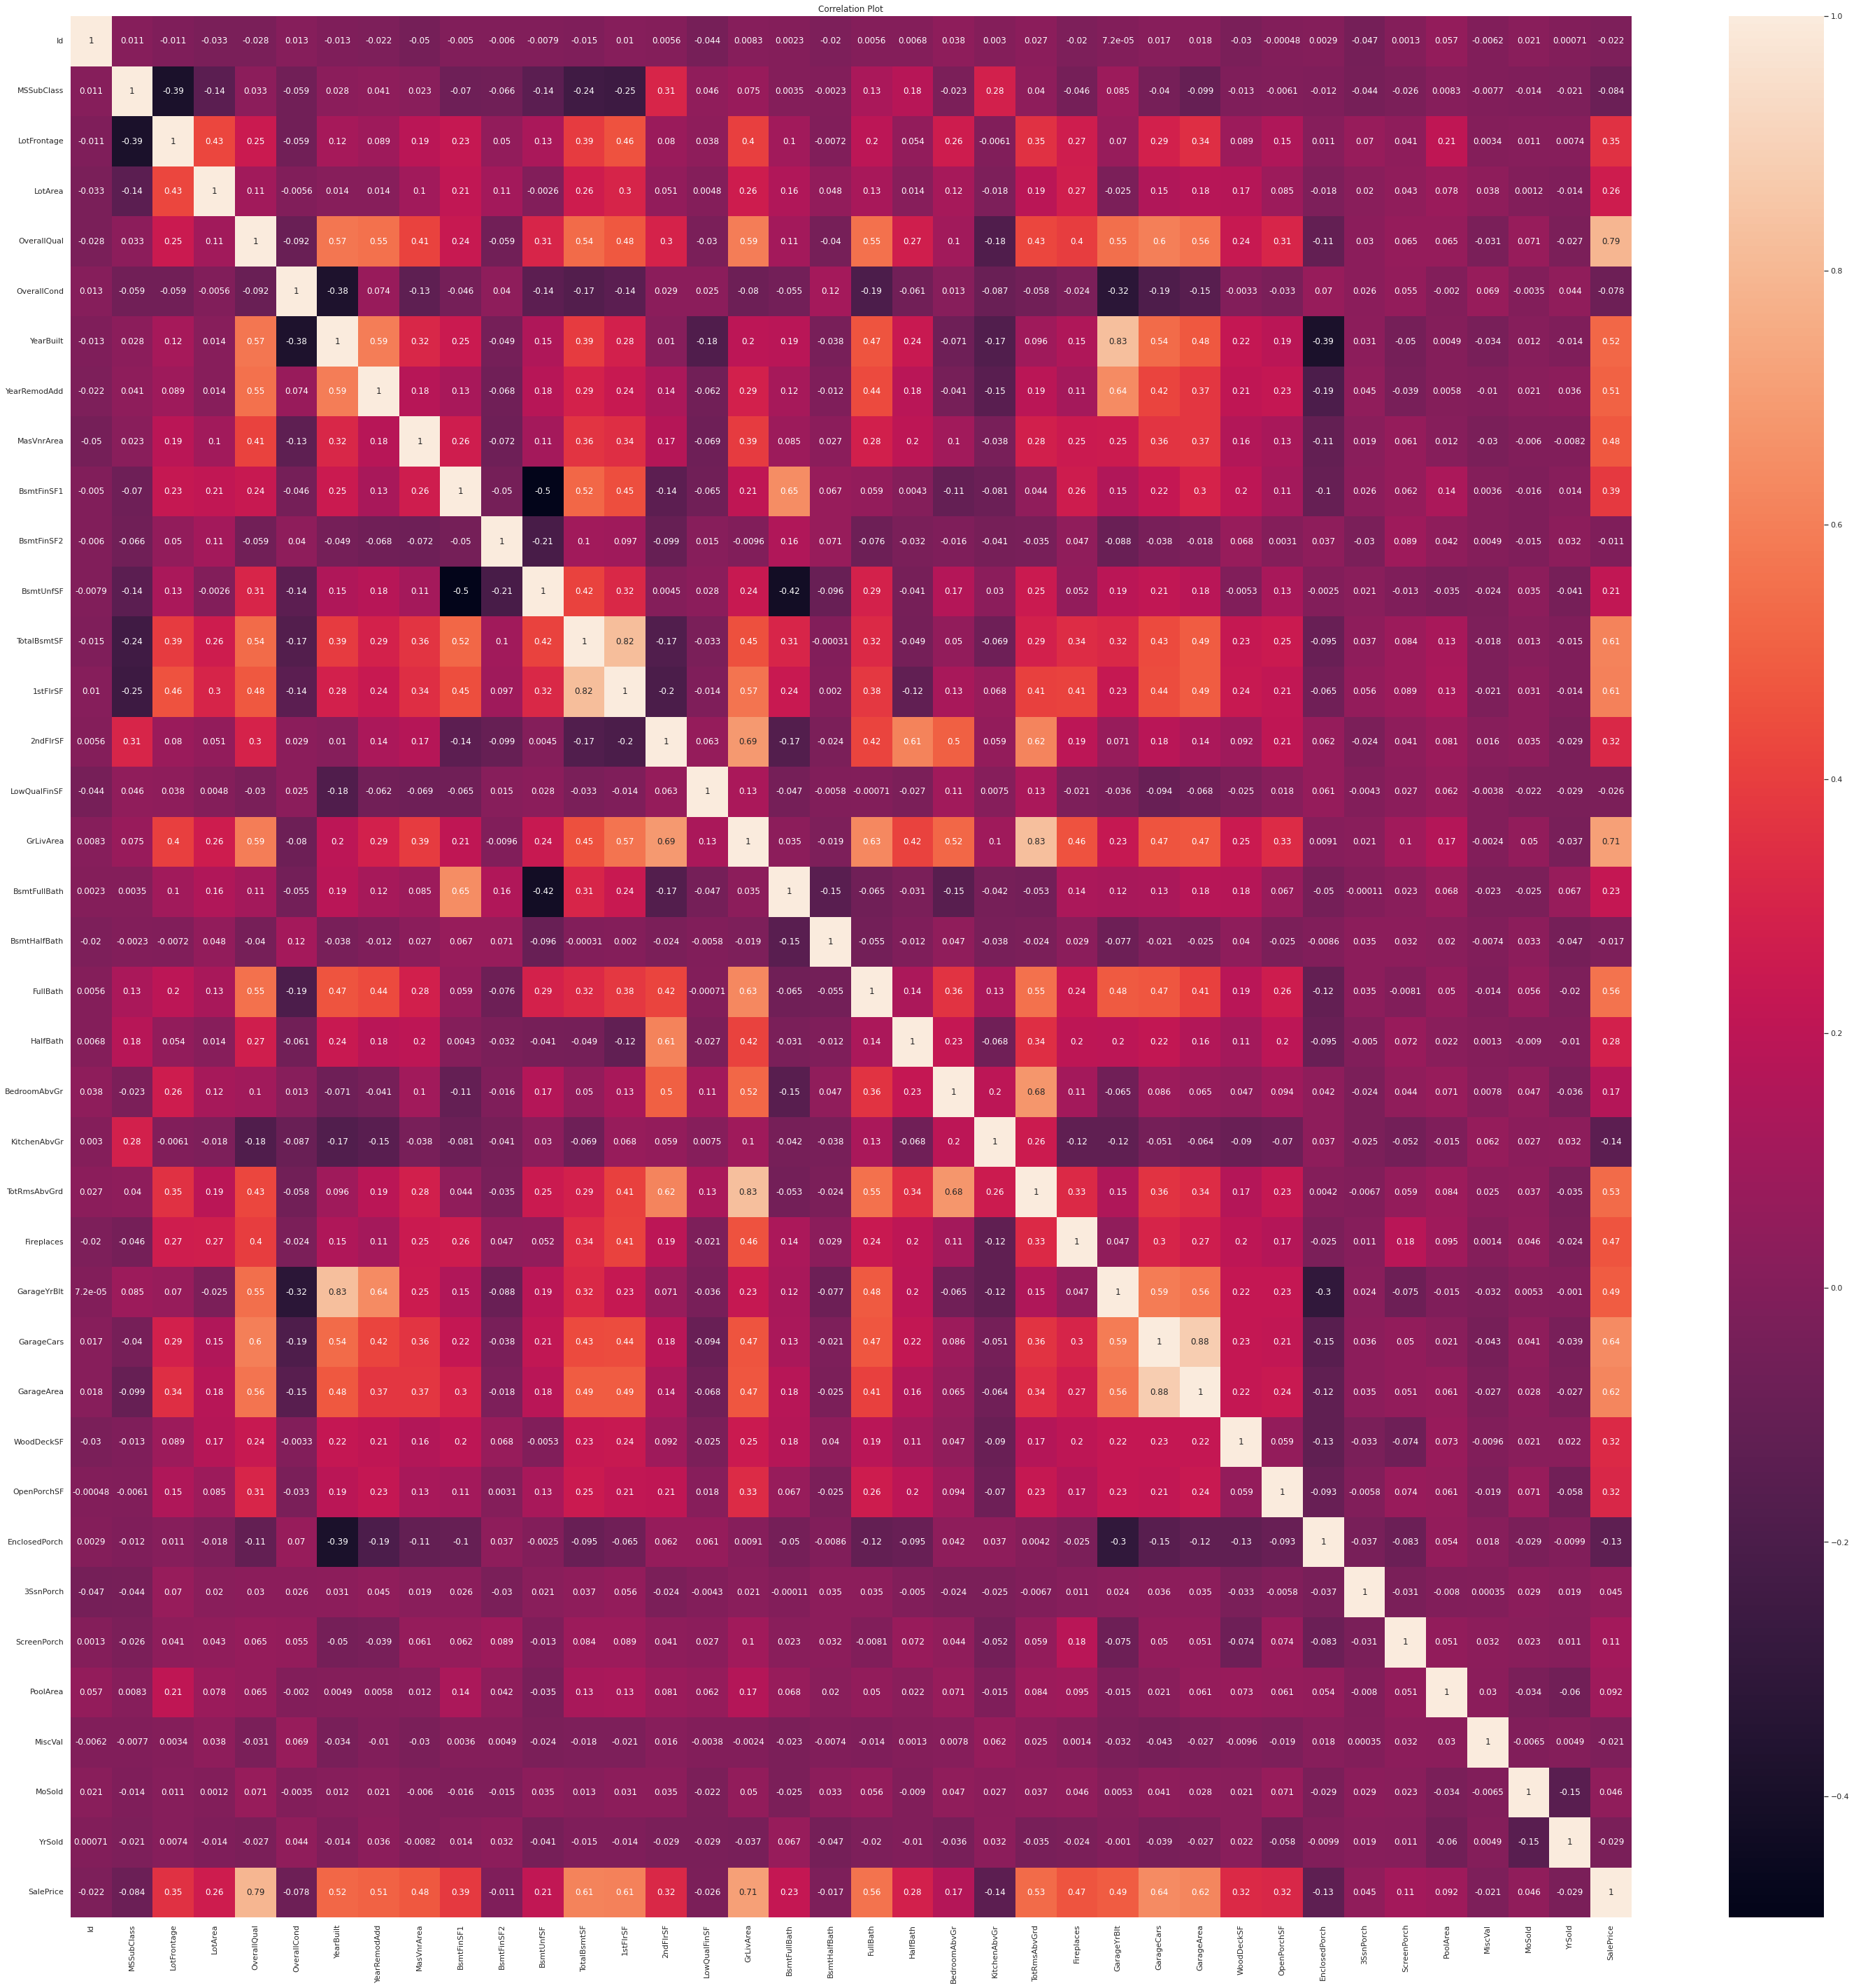

In [23]:
plt.figure(figsize=(50,50))
sns.heatmap(data_train.corr(),annot=True)
plt.title('Correlation Plot')
plt.show()

In [24]:
numeric_features=data_train.select_dtypes(include=['float64','int64'])
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [25]:
correlation=numeric_features.corr()
correlation['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<AxesSubplot:>

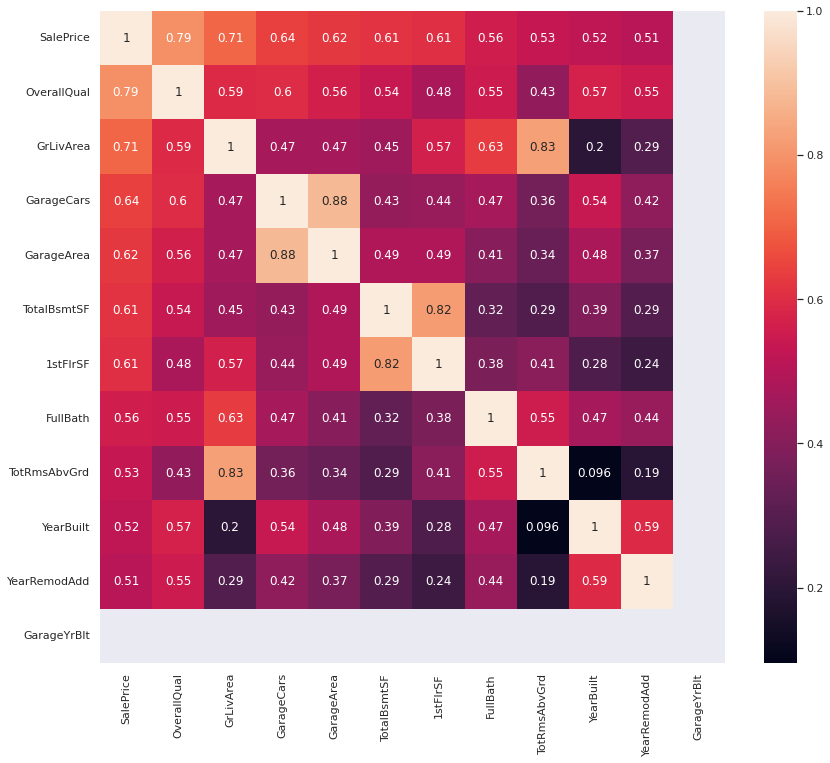

In [26]:
k =12
cols=correlation.nlargest(k,'SalePrice')['SalePrice'].index
cols
cm=np.corrcoef(data_train[cols].values.T)
f,ax=plt.subplots(figsize=(14,12))
sns.heatmap(cm,annot=True,xticklabels=cols.values,yticklabels=cols.values)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

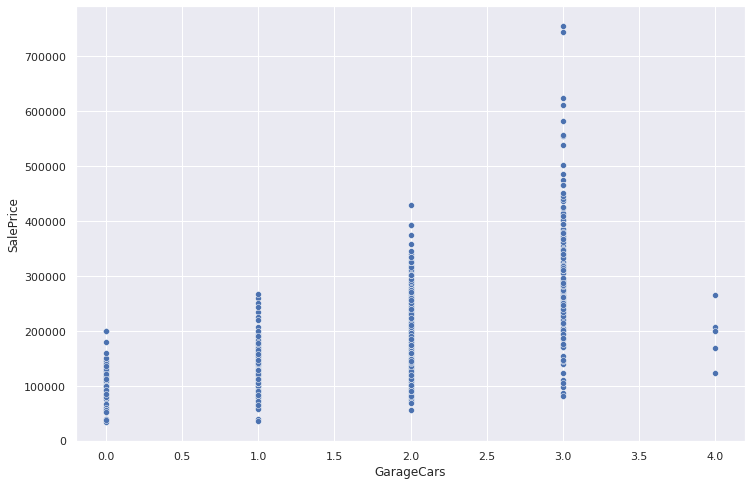

In [27]:
sns.scatterplot(x='GarageCars',y='SalePrice',data=data_train)

<AxesSubplot:xlabel='WoodDeckSF', ylabel='SalePrice'>

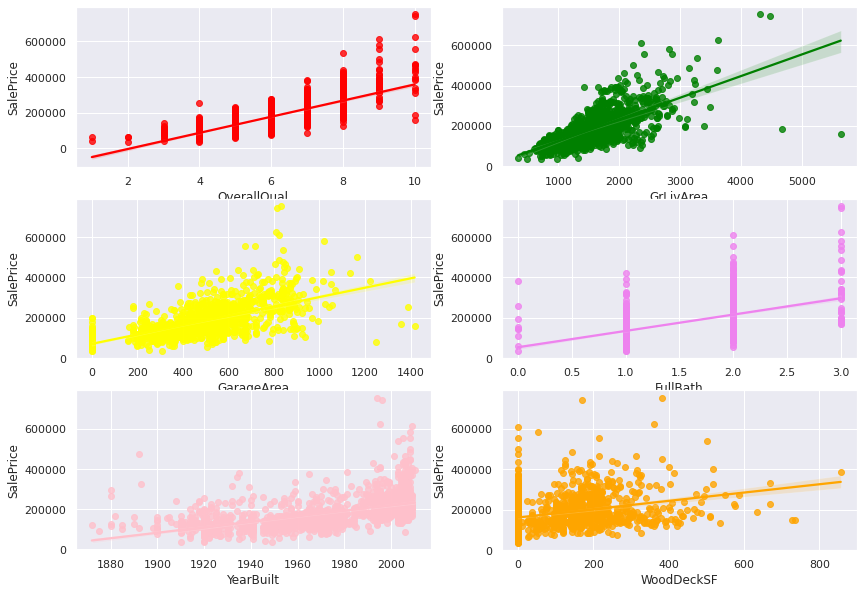

In [28]:
#scatter plots between the most correlated variables
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(nrows=3,ncols=2,figsize=(14,10))

sns.regplot(x='OverallQual',y='SalePrice',data=data_train,scatter=True,fit_reg=True,ax=ax1,color='red')

sns.regplot(x='GrLivArea',y='SalePrice',data=data_train,scatter=True,fit_reg=True,ax=ax2,color='green')

sns.regplot(x='GarageArea',y='SalePrice',data=data_train,scatter=True,fit_reg=True,ax=ax3,color='yellow')

sns.regplot(x='FullBath',y='SalePrice',data=data_train,scatter=True,fit_reg=True,ax=ax4,color='violet')

sns.regplot(x='YearBuilt',y='SalePrice',data=data_train,scatter=True,fit_reg=True,ax=ax5,color='pink')

sns.regplot(x='WoodDeckSF',y='SalePrice',data=data_train,scatter=True,fit_reg=True,ax=ax6,color='orange')

## Removing Outliers

In [29]:
data_train.shape

(1460, 76)

In [30]:
first_quartile = data_train['SalePrice'].quantile(.25)
third_quartile= data_train['SalePrice'].quantile(.75)
IQR= third_quartile - first_quartile

In [31]:
new_boundary = third_quartile + 3*IQR
data_train.drop(data_train[data_train['SalePrice']>new_boundary].index,axis=0,inplace=True)

In [32]:
data_train.shape

(1448, 76)

<AxesSubplot:xlabel='SalePrice'>

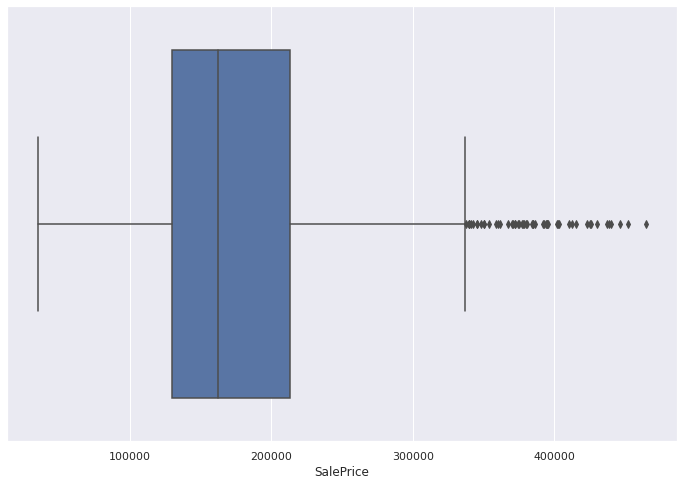

In [33]:
sns.boxplot(x=data_train['SalePrice'])

## Removing Multicollinearity and also features with poor correlation

In [34]:
correlation= numeric_features.corr()
c= correlation['SalePrice']
c[c < 0.30]

Id              -0.021917
MSSubClass      -0.084284
LotArea          0.263843
OverallCond     -0.077856
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
LowQualFinSF    -0.025606
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
Name: SalePrice, dtype: float64

In [35]:
c[c < 0.30].index 

Index(['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [36]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset,threshold): 
    col_corr=set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold: #we are interested in absolute coeff values
                colname= corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [37]:
corr_features = correlation(data_train,0.7)
len(set(corr_features))

5

In [38]:
corr_features

{'1stFlrSF', 'GarageArea', 'GarageYrBlt', 'SalePrice', 'TotRmsAbvGrd'}

In [39]:
cols_to_remove=['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold','1stFlrSF', 'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd']

In [40]:
data_train.drop(cols_to_remove,axis=1,inplace=True)

In [41]:
data_test.drop(cols_to_remove,axis=1,inplace=True)

In [42]:
data_train.head()

,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
0,RL,65.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,2,TA,TA,Y,0,61,WD,Normal,208500
1,RL,80.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,2,TA,TA,Y,298,0,WD,Normal,181500
2,RL,68.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,2,TA,TA,Y,0,42,WD,Normal,223500
3,RL,60.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,3,TA,TA,Y,0,35,WD,Abnorml,140000
4,RL,84.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,3,TA,TA,Y,192,84,WD,Normal,250000


In [43]:
df = data_train 
df_t = data_test

In [44]:
df.shape


(1448, 53)

In [45]:
df_t.shape

(1459, 52)

In [46]:
#returns the number of missing values in the data set
df.isnull().sum()

MSZoning           0
LotFrontage      258
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
2ndFlrSF           0
GrLivArea          0
FullBath           0
KitchenQual        0
Functional         0
Fireplaces         0
GarageType        81
GarageFinish      81
GarageCars         0
GarageQual        81
GarageCond        81
PavedDrive   

### Standard Scaler and Imputation KMeans

In [47]:
sc = StandardScaler()

In [48]:
df1 = df.select_dtypes(include=['float64','int64'])

In [49]:
df1.shape

(1448, 15)

In [50]:
df1.head(25)

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,7,2003,2003,196.0,706,856,854,1710,2,0,2,0,61,208500
1,80.0,6,1976,1976,0.0,978,1262,0,1262,2,1,2,298,0,181500
2,68.0,7,2001,2002,162.0,486,920,866,1786,2,1,2,0,42,223500
3,60.0,7,1915,1970,0.0,216,756,756,1717,1,1,3,0,35,140000
4,84.0,8,2000,2000,350.0,655,1145,1053,2198,2,1,3,192,84,250000
5,85.0,5,1993,1995,0.0,732,796,566,1362,1,0,2,40,30,143000
6,75.0,8,2004,2005,186.0,1369,1686,0,1694,2,1,2,255,57,307000
7,NaN,7,1973,1973,240.0,859,1107,983,2090,2,2,2,235,204,200000
8,51.0,7,1931,1950,0.0,0,952,752,1774,2,2,2,90,0,129900
9,50.0,5,1939,1950,0.0,851,991,0,1077,1,2,1,0,4,118000


In [51]:
df1.isnull().sum()

LotFrontage     258
OverallQual       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
TotalBsmtSF       0
2ndFlrSF          0
GrLivArea         0
FullBath          0
Fireplaces        0
GarageCars        0
WoodDeckSF        0
OpenPorchSF       0
SalePrice         0
dtype: int64

In [52]:
sc.fit(df1)

StandardScaler()

In [53]:
df_std = sc.transform(df1)

In [54]:
from sklearn.cluster import KMeans

In [55]:
from sklearn.experimental import  enable_iterative_imputer

In [56]:
from sklearn.impute import IterativeImputer

In [57]:
imp= IterativeImputer(estimator=KMeans(),missing_values=np.nan)

In [58]:
imp.fit_transform(df1)

array([[6.50000e+01, 7.00000e+00, 2.00300e+03, ..., 0.00000e+00,
        6.10000e+01, 2.08500e+05],
       [8.00000e+01, 6.00000e+00, 1.97600e+03, ..., 2.98000e+02,
        0.00000e+00, 1.81500e+05],
       [6.80000e+01, 7.00000e+00, 2.00100e+03, ..., 0.00000e+00,
        4.20000e+01, 2.23500e+05],
       ...,
       [6.60000e+01, 7.00000e+00, 1.94100e+03, ..., 0.00000e+00,
        6.00000e+01, 2.66500e+05],
       [6.80000e+01, 5.00000e+00, 1.95000e+03, ..., 3.66000e+02,
        0.00000e+00, 1.42125e+05],
       [7.50000e+01, 5.00000e+00, 1.96500e+03, ..., 7.36000e+02,
        6.80000e+01, 1.47500e+05]])

In [59]:
df.select_dtypes(include=['float64','int64']).isnull().sum()

LotFrontage     258
OverallQual       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
TotalBsmtSF       0
2ndFlrSF          0
GrLivArea         0
FullBath          0
Fireplaces        0
GarageCars        0
WoodDeckSF        0
OpenPorchSF       0
SalePrice         0
dtype: int64

## Filling Missing Values

In [60]:
numcols=df.select_dtypes(include=['float64','int64']).columns
numcols

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [61]:
numcols_t=df_t.select_dtypes(include=['float64','int64']).columns
numcols_t

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF'],
      dtype='object')

In [62]:
catcols=df.select_dtypes(include=['object']).columns
catcols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [63]:
catcols_t=df_t.select_dtypes(include=['object']).columns
catcols_t

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [64]:
for i in numcols:
    df[i]=df[i].fillna(df[i].median())

In [65]:
for i in numcols_t:
    df_t[i]=df_t[i].fillna(df[i].median())

In [66]:
for i in catcols:
    df[i]=df[i].fillna(df[i].mode()[0])

In [67]:
for i in catcols_t:
    df_t[i]=df_t[i].fillna(df[i].mode()[0])

In [68]:
df.isnull().sum()

MSZoning         0
LotFrontage      0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
2ndFlrSF         0
GrLivArea        0
FullBath         0
KitchenQual      0
Functional       0
Fireplaces       0
GarageType       0
GarageFinish     0
GarageCars       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
SaleType         0
SaleCondition    0
SalePrice   

In [69]:
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [70]:
df.shape

(1448, 53)

In [71]:
df_t.shape

(1459, 52)

## JOIN

In [72]:
df_main=pd.concat([df,df_t],axis=0)

In [73]:
df_main.head()

,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
0,RL,65.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,2.0,TA,TA,Y,0,61,WD,Normal,208500.0
1,RL,80.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,2.0,TA,TA,Y,298,0,WD,Normal,181500.0
2,RL,68.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,2.0,TA,TA,Y,0,42,WD,Normal,223500.0
3,RL,60.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,3.0,TA,TA,Y,0,35,WD,Abnorml,140000.0
4,RL,84.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,3.0,TA,TA,Y,192,84,WD,Normal,250000.0


In [74]:
df_main.shape

(2907, 53)

## One Hot Encoding

In [75]:
df_main = pd.get_dummies(df_main)
df_main.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,7,2003,2003,196.0,706.0,856.0,854,1710,2,...,0,0,0,1,0,0,0,0,1,0
1,80.0,6,1976,1976,0.0,978.0,1262.0,0,1262,2,...,0,0,0,1,0,0,0,0,1,0
2,68.0,7,2001,2002,162.0,486.0,920.0,866,1786,2,...,0,0,0,1,0,0,0,0,1,0
3,60.0,7,1915,1970,0.0,216.0,756.0,756,1717,1,...,0,0,0,1,1,0,0,0,0,0
4,84.0,8,2000,2000,350.0,655.0,1145.0,1053,2198,2,...,0,0,0,1,0,0,0,0,1,0


In [76]:
train = df_main.iloc[:1448,:]
test = df_main.iloc[1448:,:]

In [77]:
train.head(10)

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,7,2003,2003,196.0,706.0,856.0,854,1710,2,...,0,0,0,1,0,0,0,0,1,0
1,80.0,6,1976,1976,0.0,978.0,1262.0,0,1262,2,...,0,0,0,1,0,0,0,0,1,0
2,68.0,7,2001,2002,162.0,486.0,920.0,866,1786,2,...,0,0,0,1,0,0,0,0,1,0
3,60.0,7,1915,1970,0.0,216.0,756.0,756,1717,1,...,0,0,0,1,1,0,0,0,0,0
4,84.0,8,2000,2000,350.0,655.0,1145.0,1053,2198,2,...,0,0,0,1,0,0,0,0,1,0
5,85.0,5,1993,1995,0.0,732.0,796.0,566,1362,1,...,0,0,0,1,0,0,0,0,1,0
6,75.0,8,2004,2005,186.0,1369.0,1686.0,0,1694,2,...,0,0,0,1,0,0,0,0,1,0
7,69.0,7,1973,1973,240.0,859.0,1107.0,983,2090,2,...,0,0,0,1,0,0,0,0,1,0
8,51.0,7,1931,1950,0.0,0.0,952.0,752,1774,2,...,0,0,0,1,1,0,0,0,0,0
9,50.0,5,1939,1950,0.0,851.0,991.0,0,1077,1,...,0,0,0,1,0,0,0,0,1,0


In [78]:
train.shape

(1448, 249)

In [79]:
test.head(10)

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,80.0,5,1961,1961,0.0,468.0,882.0,0,896,1,...,0,0,0,1,0,0,0,0,1,0
1,81.0,6,1958,1958,108.0,923.0,1329.0,0,1329,1,...,0,0,0,1,0,0,0,0,1,0
2,74.0,5,1997,1998,0.0,791.0,928.0,701,1629,2,...,0,0,0,1,0,0,0,0,1,0
3,78.0,6,1998,1998,20.0,602.0,926.0,678,1604,2,...,0,0,0,1,0,0,0,0,1,0
4,43.0,8,1992,1992,0.0,263.0,1280.0,0,1280,2,...,0,0,0,1,0,0,0,0,1,0
5,75.0,6,1993,1994,0.0,0.0,763.0,892,1655,2,...,0,0,0,1,0,0,0,0,1,0
6,69.0,6,1992,2007,0.0,935.0,1168.0,0,1187,2,...,0,0,0,1,0,0,0,0,1,0
7,63.0,6,1998,1998,0.0,0.0,789.0,676,1465,2,...,0,0,0,1,0,0,0,0,1,0
8,85.0,7,1990,1990,0.0,637.0,1300.0,0,1341,1,...,0,0,0,1,0,0,0,0,1,0
9,70.0,4,1970,1970,0.0,804.0,882.0,0,882,1,...,0,0,0,1,0,0,0,0,1,0


In [80]:
test.shape

(1459, 249)

## Train- Test Split

In [81]:
x = train.drop("SalePrice",axis=1)
y = train[["SalePrice"]]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=49)

print("X_train:", x_train.shape)
print("X_test:", x_test.shape)
print("Y_train:", y_train.shape)
print("Y_test:", y_test.shape)

X_train: (1158, 248)
X_test: (290, 248)
Y_train: (1158, 1)
Y_test: (290, 1)


## Prediction

In [82]:
from sklearn.ensemble import RandomForestRegressor
R_model = RandomForestRegressor()
R_model.fit(x_train,y_train)
preds = R_model.predict(x_test)

pred_data = list(x_test.iloc[1])
R_model.predict(np.array(pred_data).reshape(1, -1))

from sklearn.metrics import r2_score
r = r2_score(y_test,preds)
print("R2score when we predict using Randomn forest is ",r)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


R2score when we predict using Randomn forest is  0.8783852552636042


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [83]:
from sklearn.model_selection import cross_val_score

accuracies=cross_val_score(R_model,x_train,y_train,cv=10)
accuracies.mean()*100

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

85.54318278351106

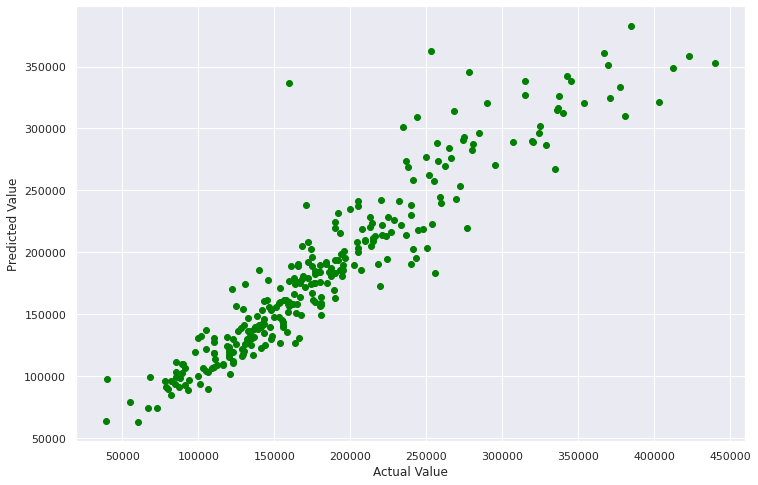

In [84]:
plt.scatter(y_test,preds,color="green")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

In [85]:
R_model.feature_importances_

array([9.50252378e-03, 5.43693513e-01, 1.70799071e-02, 1.07318576e-02,
       5.76129621e-03, 3.65761728e-02, 6.95030880e-02, 7.17256648e-03,
       1.32983941e-01, 5.25440836e-03, 3.57646564e-03, 4.45505420e-02,
       6.18558136e-03, 7.33656001e-03, 1.54240589e-04, 1.57736250e-04,
       8.77361398e-05, 1.15790388e-03, 3.11228851e-03, 2.10038680e-05,
       1.14501537e-05, 1.00791476e-03, 1.47431985e-04, 8.62763658e-06,
       2.47426243e-03, 5.82072822e-04, 6.89700995e-04, 1.54548077e-04,
       1.01265679e-03, 1.42794876e-06, 2.63996550e-06, 4.70833911e-04,
       4.49149465e-04, 1.38156155e-04, 3.98620138e-05, 6.83466220e-04,
       7.61970613e-04, 2.20925405e-04, 2.88453654e-04, 6.21428390e-05,
       1.23617681e-05, 1.03291076e-05, 1.46053120e-04, 2.47429825e-04,
       5.10804299e-04, 1.36651254e-03, 3.41929641e-04, 1.73593158e-04,
       2.41733924e-04, 1.09773695e-04, 6.87042815e-05, 6.86300915e-04,
       1.77659456e-05, 1.19299451e-04, 1.48545579e-04, 1.26831977e-03,
      

In [86]:
R_model.estimators_

[DecisionTreeRegressor(max_features='auto', random_state=549240851),
 DecisionTreeRegressor(max_features='auto', random_state=884825408),
 DecisionTreeRegressor(max_features='auto', random_state=309460948),
 DecisionTreeRegressor(max_features='auto', random_state=1519122755),
 DecisionTreeRegressor(max_features='auto', random_state=150263018),
 DecisionTreeRegressor(max_features='auto', random_state=1359506714),
 DecisionTreeRegressor(max_features='auto', random_state=480957561),
 DecisionTreeRegressor(max_features='auto', random_state=108408289),
 DecisionTreeRegressor(max_features='auto', random_state=1101541576),
 DecisionTreeRegressor(max_features='auto', random_state=732420352),
 DecisionTreeRegressor(max_features='auto', random_state=329345477),
 DecisionTreeRegressor(max_features='auto', random_state=1157827653),
 DecisionTreeRegressor(max_features='auto', random_state=1324242006),
 DecisionTreeRegressor(max_features='auto', random_state=982635028),
 DecisionTreeRegressor(max_fe

In [87]:
x=test.drop("SalePrice",axis=1)
preds1=R_model.predict(x)

In [88]:
preds1

array([120555.83, 155437.5 , 185312.34, ..., 146738.55, 114429.95,
       232635.  ])

In [89]:
len(preds1)

1459

In [90]:
df_sub=pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")

In [91]:
df_sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [92]:
df_sub.shape

(1459, 2)

In [93]:
df_sub['SalePrice'] = preds1

In [94]:
df_sub.to_csv('House_kagg.csv',index=False)